<a href="https://colab.research.google.com/github/manuelreyes1603/Practica_Git__/blob/main/T_Equipo_Azul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Nacional Autonoma de Mexico**
## Facultad de Ciencias
## Profesor:
## Asignatura: Inferencia estadistica

### Integrantes del Equipo Azul:
- González Martínez José Eduardo
- Hernandez Damian Josue Valdemar
- Martínez García Oscar
- Reyes Montaño José Manuel





1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

print("a) Agrupe los datos en una distribución de frecuencias.")
nivcoles= [239, 212, 249, 227, 218, 310, 281, 330, 226, 233, 195, 233, 161, 195, 233, 249,
              284, 245, 174, 154, 256, 163, 196, 299, 210, 301, 199, 258, 205, 195, 227, 244, 297, 355, 234, 195,179, 357, 282, 265, 286, 286, 176]
# frecuencia absoluta:cuantas veces aparece el dato en la muestra
frec_Abs = Counter(nivcoles)
# frecuencia relativa: frec_Abs / N
N = len(nivcoles) #total de datos
frec_rel = {num: freq/N for num, freq in frec_Abs.items()} #se crea un diccionario con un for para asignar a cada numero su frec_relativa

#como la frecuencia acumulada es la suma de las anteriores  frecuencias absoluta, se inicializa variables
frec_acum = {}
frec_rel_acum = {}
acumulado = 0
acumulado_rel = 0

for num in sorted(frec_Abs.keys()): #recorrer el diccionario de forma ascendente con la funcion sorted
    acumulado += frec_Abs[num] #sumar las frecuencias absolutas
    acumulado_rel += frec_rel [num] #sumar las frecuncias relativas
    frec_acum[num] = acumulado
    frec_rel_acum[num] = acumulado_rel

# Crear un DataFrame de pandas
tabla = pd.DataFrame({
    'Niveles de Colesterol': sorted(frec_Abs.keys()),
    'Frecuencia Absoluta': [frec_Abs[num] for num in sorted(frec_Abs.keys())],
    'Frecuencia Relativa': [frec_rel[num] for num in sorted(frec_Abs.keys())],
    'Frecuencia Acumulada': [frec_acum[num] for num in sorted(frec_Abs.keys())],
    'Frecuencia Relativa Acumulada': [frec_rel_acum[num] for num in sorted(frec_Abs.keys())]
})

print(tabla.to_string(index=False, float_format='%.4f'))

a) Agrupe los datos en una distribución de frecuencias.
 Niveles de Colesterol  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada  Frecuencia Relativa Acumulada
                   154                    1               0.0233                     1                         0.0233
                   161                    1               0.0233                     2                         0.0465
                   163                    1               0.0233                     3                         0.0698
                   174                    1               0.0233                     4                         0.0930
                   176                    1               0.0233                     5                         0.1163
                   179                    1               0.0233                     6                         0.1395
                   195                    4               0.0930                    10                         0.2326


b) Grafique el histograma de frecuencias relativas y comente la forma de la distribución.
La distribución es asimétrica hacia la derecha (sesgada a la derecha),
con una concentración de datos en los rangos más bajos de colesterol, porque a la izquiera estan los datos más grandes


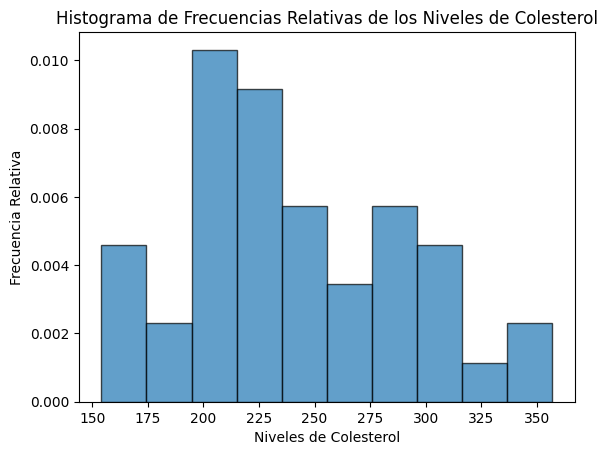

In [ ]:
print("b) Grafique el histograma de frecuencias relativas y comente la forma de la distribución.")
respuesta = """La distribución es asimétrica hacia la derecha (sesgada a la derecha),
con una concentración de datos en los rangos más bajos de colesterol, porque a la izquiera estan los datos más grandes"""
print(respuesta)
# Crear histograma de frecuencias relativas
plt.hist(nivcoles, bins=10, density=True, edgecolor='black', alpha=0.7)

# Añadir títulos y etiquetas
plt.title('Histograma de Frecuencias Relativas de los Niveles de Colesterol')
plt.xlabel('Niveles de Colesterol')
plt.ylabel('Frecuencia Relativa')

# Mostrar el gráfico
plt.show()


In [ ]:
print("c) Calcule la media y la desviación estándar.")
# media: es la suma de todas las observaciones y se dividen sobre el tamaño de la muestra
media = sum(nivcoles) / N
# desviación estándar es la raiz de la varianza
#la varianza se calcula como la suma de cada muestra menos la media al cuadrado y todo eso entre el tamaño de la muestra menos 1
varianza = sum((x - media) ** 2 for x in nivcoles) / N-1
desviacion_estandar = varianza ** 0.5
print("Media:", media)
print("Desviación estándar:", desviacion_estandar)

c) Calcule la media y la desviación estándar.
Media: 239.8372093023256
Desviación estándar: 50.3265754533643


d) Grafique la función de distibución acumulativa de la muestra y use esta gráfica para determinar la mediana y los cuartiles.
Basta con trazar una recta en y=i (eje de las probabilidades), donde i es 0.25,0.5 o 0.75, y ver que x le corresponde


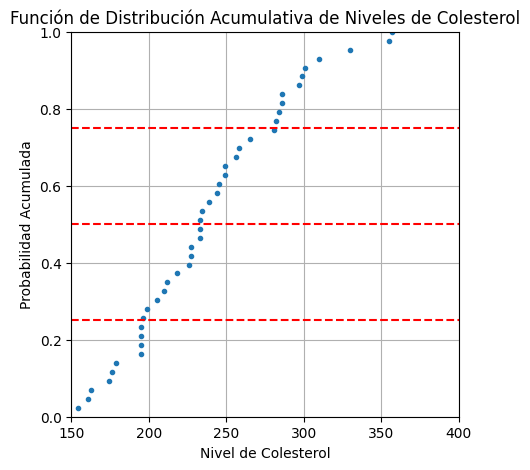

El nivel de colesterol cuando la probabilidad acumulada es 0.5 es aproximadamente: 233 (corresponde a la mediana)
El nivel de colesterol cuando la probabilidad acumulada es 0.25 es aproximadamente: 196 (corresponde al percentil 25%)
El nivel de colesterol cuando la probabilidad acumulada es 0.75 es aproximadamente: 281 (corresponde al percentil 75%)
Usando las funciones de python, veremos que se acerca bastante
Mediana: 233.0
percentil 25%: 197.5
percentil 75%: 281.5


In [ ]:
print("d) Grafique la función de distibución acumulativa de la muestra y use esta gráfica para determinar la mediana y los cuartiles.")
print("Basta con trazar una recta en y=i (eje de las probabilidades), donde i es 0.25,0.5 o 0.75, y ver que x le corresponde")
# Ordenar los datos
nivcoles_orde = np.sort(nivcoles)

# Calcular la función de distribución acumulativa
n = len(nivcoles_orde)
cdf = np.arange(1, n + 1) / n #arrego de n, divido sobre el tamañp de la muestra,
#representa la posición acumulativa de cada dato, es decir el primer dato ordenado tiene una prob de 1/n, asi sucesivamente

# Graficar la FDA
plt.figure(figsize=(5, 5))
plt.plot(nivcoles_orde, cdf, marker='.', linestyle='none')
plt.title('Función de Distribución Acumulativa de Niveles de Colesterol')
plt.xlabel('Nivel de Colesterol')
plt.ylabel('Probabilidad Acumulada')
plt.grid()
plt.xlim([150, 400])
plt.ylim([0, 1])

plt.axhline(y=0.5, color='r', linestyle='--')  # Línea en y=0.5
plt.axhline(y=0.25, color='r', linestyle='--')  # Línea en y=0.25
plt.axhline(y=0.75, color='r', linestyle='--')  # Línea en y=0.75

plt.show()

# Encontrar el valor de x cuando y=i
# calcula la diferencia entre cada valor en la CDF y i, lo saca en valor absoluto y
#Encuentra el índice del valor mínimo en el array de diferencias que corresponde al punto más cercano a i con la funcion argmin
mediana = nivcoles_orde[np.abs(cdf - 0.5).argmin()]
p25 = nivcoles_orde[np.abs(cdf - 0.25).argmin()]
p75 = nivcoles_orde[np.abs(cdf - 0.75).argmin()]

print(f"El nivel de colesterol cuando la probabilidad acumulada es 0.5 es aproximadamente: {mediana} (corresponde a la mediana)")
print(f"El nivel de colesterol cuando la probabilidad acumulada es 0.25 es aproximadamente: {p25} (corresponde al percentil 25%)")
print(f"El nivel de colesterol cuando la probabilidad acumulada es 0.75 es aproximadamente: {p75} (corresponde al percentil 75%)")


print("Usando las funciones de python, veremos que se acerca bastante")
mediana_ = np.median(nivcoles)
per25 = np.percentile(nivcoles, 25)
per75= np.percentile(nivcoles, 75)
print(f'Mediana: {mediana_}')
print(f'percentil 25%: {per25}')
print(f'percentil 75%: {per75}')

2.

a) El 90vo percentil es 5.135

b) El primer cuartil es 4.32
   El segundo cuartil o la mediana es 4.515
   El tercer cuartil es 4.7

c)


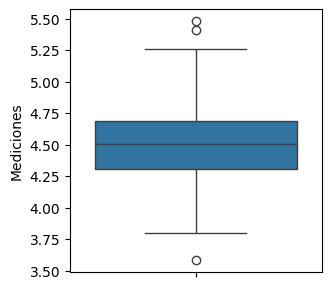


d) Intervalo x±s; x-s = 4.139250684684397 , x+s = 4.875549315315602

   Intervalo x±2s; x-2s = 3.7711013693687945 , x+2s = 5.243698630631204

   Intervalo x±3s; x-3s = 3.402952054053192 , x+3s = 5.611847945946807

e)
   Medidas contenidas en el Tercer intervalo: [3.58, 5.26, 5.41, 5.48]
   Medidas contenidas en el Segundo intervalo: [3.8, 4.01, 4.01, 4.05, 4.05, 4.12, 5.07, 5.2]
   Medidas contenidas en el Primer intervalo: [4.18, 4.2, 4.21, 4.27, 4.28, 4.3, 4.32, 4.33, 4.35, 4.35, 4.41, 4.42, 4.45, 4.45, 4.5, 4.5, 4.5, 4.5, 4.51, 4.52, 4.52, 4.52, 4.57, 4.58, 4.6, 4.61, 4.61, 4.62, 4.62, 4.65, 4.7, 4.7, 4.7, 4.7, 4.72, 4.78, 4.78, 4.8]

f)


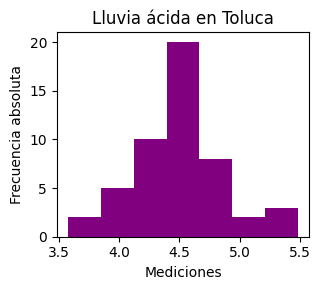

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

'''
2. Se recolectaron 50 mediciones de lluvia ácida en Toluca:
'''
mediciones = [3.58, 3.80, 4.01, 4.01, 4.05, 4.05, 4.12, 4.18, 4.20, 4.21, 4.27, 4.28, 4.30, 4.32, 4.33, 4.35, 4.35, 4.41, 4.42, 4.45, 4.45, 4.50, 4.50, 4.50, 4.50,
              4.51, 4.52, 4.52, 4.52, 4.57, 4.58, 4.60, 4.61, 4.61, 4.62, 4.62, 4.65, 4.70, 4.70, 4.70, 4.70, 4.72, 4.78, 4.78, 4.80, 5.07, 5.20, 5.26, 5.41, 5.48]

#______________Función auxiliar______________#
def p_percentil(p:float, muestra:list)->float:
  '''
  Calcula el p-ésimo percentil de la muestra dada.
  '''
  n = len(sorted(muestra))
  if (n*p % 1) != 0:   #Si es entero np%1 nos devuelve un 0 pero si no es entero nos devuelve la parte decimal
      percentil = muestra[math.ceil(n*p)]
  else:
      k = int(n*p)
      percentil = (muestra[k] + muestra[k+1])/2
  return percentil
#____________________________________________#

'''
    a) Encuentre el 90vo percentil.
'''
print(f'a) El 90vo percentil es {p_percentil(.90, mediciones)}\n')

'''
    b) Calcule la mediana y los cuartiles.
'''
print(f'b) El primer cuartil es {p_percentil(.25, mediciones)}')
print(f'   El segundo cuartil o la mediana es {p_percentil(.50, mediciones)}')
print(f'   El tercer cuartil es {p_percentil(.75, mediciones)}')

'''
    c) Grafique los datos en un diagrama de caja y brazos (bloxplot).
'''
print('\nc)')
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 2)
sns.boxplot(data = mediciones)
plt.ylabel("Mediciones")
plt.tight_layout()
plt.show()

'''
    d) Determine los intervalos: x±s, x±2s, x±3s.
'''
X, S = 0, 0
for i in mediciones:
  X += i
X = X/len(mediciones)
for j in mediciones:
  S += (j-X)**2
S = math.sqrt(S/(len(mediciones)-1))
intervalos = [[X-S, X+S], [X-2*S, X+2*S], [X-3*S, X+3*S]]
print(f'\nd) Intervalo x±s; x-s = {intervalos[0][0]} , x+s = {intervalos[0][1]}')
print(f'\n   Intervalo x±2s; x-2s = {intervalos[1][0]} , x+2s = {intervalos[1][1]}')
print(f'\n   Intervalo x±3s; x-3s = {intervalos[2][0]} , x+3s = {intervalos[2][1]}')

'''
    e) ¿Qué medidas están contenidas en los intervalos anteriores?
'''
print('\ne)')
contenciones = dict()
i1, i2, i3, ino = [], [], [], []
for medicion in mediciones:
  if intervalos[0][0] < medicion and medicion < intervalos[0][1]:
    i1.append(medicion)
    contenciones['Primer intervalo'] = i1
  elif intervalos[1][0] < medicion and medicion < intervalos[1][1]:
    i2.append(medicion)
    contenciones['Segundo intervalo'] = i2
  elif intervalos[2][0] < medicion and medicion < intervalos[2][1]:
    i3.append(medicion)
    contenciones['Tercer intervalo'] = i3
  else:
    ino.append(medicion)
    contenciones['Nulo'] = ino
for key in contenciones.keys():
  print(f'   Medidas contenidas en el {key}: {contenciones[key]}')
'''
    f) Haga un histograma de los datos.
'''
print('\nf)')
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.hist(mediciones, bins='sturges', color='purple')
plt.title("Lluvia ácida en Toluca")
plt.xlabel("Mediciones")
plt.ylabel("Frecuencia absoluta")
plt.tight_layout()
plt.show()

3.

a) Construya la gráfica de pastel para hombres y mujeres.


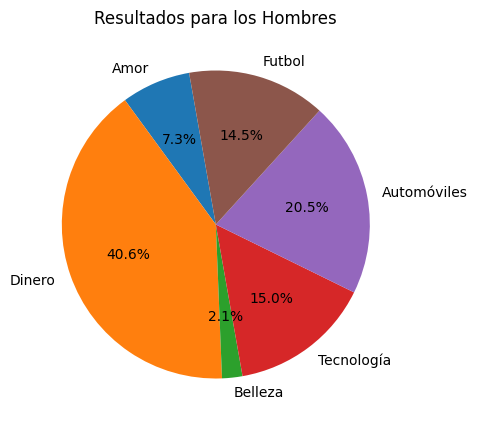

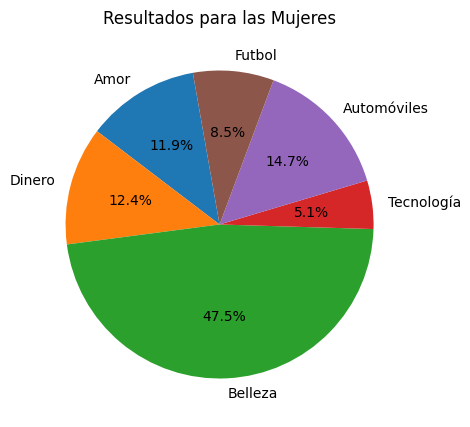

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
"""
Se aplicó una encuesta a hombres y mujeres para saber que resulta más interesante
 para esta población, y se obtuvieron los siguientes resultados:
__________________________________________________________________
 Intereses|Amor| Dinero| Belleza| Tecnología| Automóviles| Futbol|
 Hombres  |17  |95     |5       |35         |48          |34     |
 Mujeres  |21  |22     |84      |9          |26          |15     |
"""
print( "a) Construya la gráfica de pastel para hombres y mujeres.")
data={
  'Intereses':['Amor', 'Dinero', 'Belleza', 'Tecnología', 'Automóviles', 'Futbol'],
  'Hombres': [17, 95, 5, 35, 48, 34],
  'Mujeres': [21, 22, 84, 9, 26, 15]}
#Creamos un dataframe para un mejor manejo de los datos
datos= pd.DataFrame(data)

#Extraemos cada una de las columnas
intereses = datos['Intereses']
hombres = datos['Hombres']
mujeres = datos['Mujeres']

""" Generamos los gráficos de pastel correspondientes"""
#Tabla para hombres
plt.figure(figsize=(5, 5))
plt.pie(hombres, labels=intereses, autopct='%1.1f%%', startangle=100)
plt.title("Resultados para los Hombres")

#Tabla para mujeres
plt.figure(figsize=(5, 5))
plt.pie(mujeres, labels=intereses, autopct='%1.1f%%', startangle=100)
plt.title("Resultados para las Mujeres")

#Mostramos las graficas
plt.show()



#**b) ¿Qué diferencias puede notar en los intereses relativos de los hombres en comparación con las mujeres?**

Las principal diferencia que podemos notar es en el caso de su interes por la belleza, en el caso de las mujeres se concentraron cerca del **50%** de los datos, mientras que con los hombres solo un **2%** lo considera dentro de sus intereses. Por otro lado, en donde podemos notar una diferencia considerable entre hombres y mujeres en el caso de su interes por la tecnologia, el **15%** de los hombres la escogieron y el **5.1%** de las mujeres se interesan por este tema.

Los temas en los que los hombres menos se interesan es en el amor y en la belleza, con el **9.4%** de la muestra (**7.3%** y **2.1%**, respectivamente), aun menor que en el tercer tema en el que menos mostraron interes. Las mujeres tuvieron un rechazo significativo con un tema en especifico, la tecnologia, con solo el **5.1%** del total.

En el caso de las mujeres se vio un interes similar entre los temas: el dinero (**12.4%**), el amor (**11.9%**) y los automoviles (**14.7%**). Con un promedio del **13%** del interes en este caso.

El amor tiene un interés similar entre hombres (**7.3%**) y mujeres (**11.9%**), pero con una ligera mayor preferencia entre las mujeres. A pesar de que es una diferencia grande, es la única similitud entre las preferencias vistas en las muestras.

Se puede concluir que las preferencias sobre temas especificos entre mujeres y hombres varian en demasia, ya que en el caso de la muestra tanto los hombres como las mujeres tienen preferencias diferentes. No podemos generalizar un comportamiento respecto a las preferecias debido a que las muestras son demasiado pequeñas.

**4**.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
"""
El dataset titanic.csv con tiene información sobre algunos pasajeros del titanic, con
estos datos realice lo siguiente:
"""

print("""a) Realice un análisis descriptivo de la base de datos.""")

csv = pd.read_csv('titanic.csv')
print(csv.head())
print(csv.tail())

print(csv.describe())

a) Realice un análisis descriptivo de la base de datos.
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
     Survived  Pclass                

Podemos notar que nuestra base de datos esta compuesta de 887 pasajeros junto a algunas características/propiedades suyas.

Podemos interpretar los datos de la siguiente manera:

De la columna survived:

-Aproximadamente el 38.55% de los pasajeros sobrevivió

De la columna Pclass:

-La mayoría de los pasajeros viajaban en 2da o 3ra clase, el 50% viajaba en 3ra clase.

-Las clases van desde la 1-3.

De la columna Age:

-El promedio de las edades de los pasajeros es de 29.47 años.

-La mitad de los pasajeros tiene 28 años.

-La edad de los pasajeros va de 0.42 - 80 años.

De la columna Siblings/Spouses aboard:

-El promedio de hermanos o esposas es menor por pasajero es menor a 1.

-Los pasajeros viajaban con 0 - 8 hermanos/esposas.

-El 50% de pasajeros no viajaban con hermanos/esposa.

De la columna Parents/Children Aboard:

-El promedio de padres/hijos de los pasajeros es menor a 1.

-En promedio los pasajeros iban con o hasta 6 hermanos/padres.

De la columna  Fare:

-La tarifa promedio que se pagó fue de 32.30.

-Aproximadamente la mitad de los pasajeros pagó alrededor de 14.45

-La tarifa mínima fue de 0 mientras que la máxima fue de 512.33

b) Grafique el numero de personas que sobrevivieron y las que no sobrevivieron
(gráfico de barras) y la tasa de supervivencia por sexo, también por clase


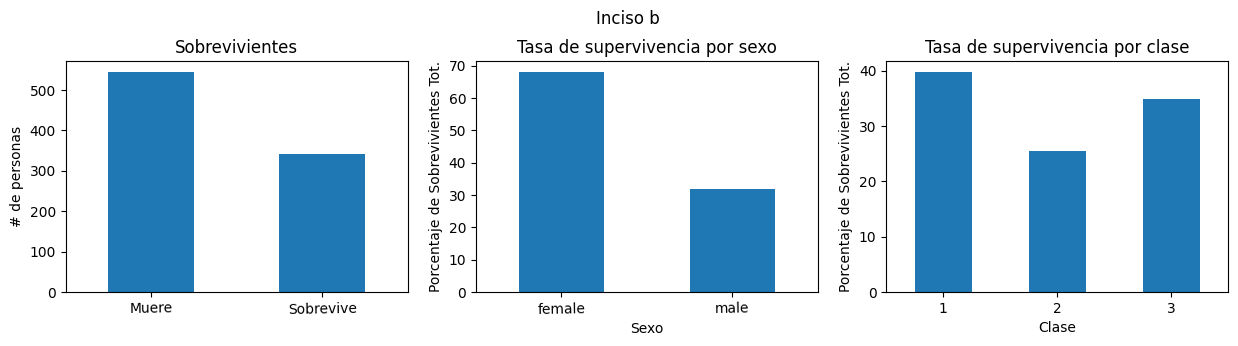

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("""b) Grafique el numero de personas que sobrevivieron y las que no sobrevivieron
(gráfico de barras) y la tasa de supervivencia por sexo, también por clase""")


csv = pd.read_csv('titanic.csv',header=0)

dataframe=pd.DataFrame(csv[['Survived','Pclass','Sex','Age']])

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
fig.suptitle('Inciso b', y=1.05)

# a)
dataframe['Survived'].value_counts().plot(kind="bar",rot=1,ax = axs[0])

etiquetas = ['Muere','Sobrevive']
axs[0].set_xticklabels(etiquetas)
axs[0].set_xlabel(None)
axs[0].set_ylabel('# de personas')
axs[0].set_title('Sobrevivientes')

# b)
total_vivos = dataframe[dataframe['Survived'] == 1].shape[0]
porcentaje_vivos = dataframe[dataframe['Survived'] == 1].groupby('Sex').size() / total_vivos * 100

porcentaje_vivos.plot(kind='bar',rot=1,ax = axs[1])
axs[1].set_title('Tasa de supervivencia por sexo')
axs[1].set_xlabel('Sexo')
axs[1].set_ylabel('Porcentaje de Sobrevivientes Tot.')

# c)
porcentaje_vivos = dataframe[dataframe['Survived'] == 1].groupby('Pclass').size() / total_vivos * 100

porcentaje_vivos.plot(kind='bar',rot=1,ax = axs[2])
axs[2].set_title('Tasa de supervivencia por clase')
axs[2].set_xlabel('Clase')
axs[2].set_ylabel('Porcentaje de Sobrevivientes Tot.')


plt.show()




In [ ]:
print( f"¿En que rango de edad se encuentra la mayorıa de sobrevivientes del accidente? ")

vivos = dataframe[dataframe['Survived'] == 1]
edad_vivos = vivos['Age'].dropna()

#Rango de edad donde se encuentra la mayoría de los sobrevivientes
plt.figure(figsize=(7, 3))
sns.histplot(edad_vivos, bins=10, kde=True, color='orange')
plt.title('Distribución de edades de los sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

most_common_age = edad_vivos.mode()[0]

# Percentiles
age_percentiles = edad_vivos.quantile([0.25, 0.75])

# Resultados
print(f"La edad más frecuente entre los sobrevivientes es: {most_common_age} años")
print(f"Dado que los percentiles 25% y 75% de las edades son:\n{age_percentiles}", "Entonces la mayoría de sobrevivientes se encuentran entre esas edades")

¿En que rango de edad se encuentra la mayorıa de sobrevivientes del accidente? 


NameError: name 'dataframe' is not defined

##**d) ¿Qué podemos concluir de los datos?**
Despues de todos los datos obtenidos a lo largo del ejercico, se puede decir que en el accidente el titanic fueron mas las personas que fallecieron que las personas que lograron sobrevivir.

Haciendo enfasis en las personas sobrevivientes, se puede notar a comparacion con los hombres, las mujeres tuvieron una mayor tasa de sobrevivencia; en concecuencia, sobrevivio mas porcentaje de las mujeres que de los hombres que estaban a bordo del barco.

Mientras que por su clase, podemos notar que haciendo este analisis desde la perspectiva de la clase, podemos notar que sobrevivio mas porcentaje de las personas que se encontraban en la clase 1, las cuales eran personas con mas recursos, lo cual nos podria decir que a mayor precio del boleto mayor seria la seguridad o preferencia que estos tendrian al abordar el barco. Mientras que las personas de la clase 2 fueron las que mas perdidas humanas tuvieron al momento del accidente.

Las adultos jovenes (entre 20 y 30 años de edad) fueron los que mas sobrevivieron. Es curioso ver que a medida que va avanzando la edad era menos probable que estas personas lograran sobrevivir.

Dado a lo observado, podemos concluir que a pesar de que sobrevivieron pocas personas. Las personas que se salvaron fueron de cierta manera seleccionadas de manera muy especifica (y en funcion de lo que podian aportar a futuro), mujeres (reproduccion), personas con recursos economicos altos (empleadores) y adultos jovenes (mano de obra).
